# Task 5: Decision Tree on Titanic Dataset

● Load Titanic dataset (or use a similar dataset).

● Preprocess (handle missing values, encode categorical variables).

● Train a DecisionTreeClassifier.

● Visualize the decision tree using plot_tree.

● Evaluate the model using accuracy and confusion matrix.

In [1]:
url = "https://raw.githubusercontent.com/ShubhamSinghal12/GLA_pythonML2025/refs/heads/main/LogisticRegression/Titanic.csv"

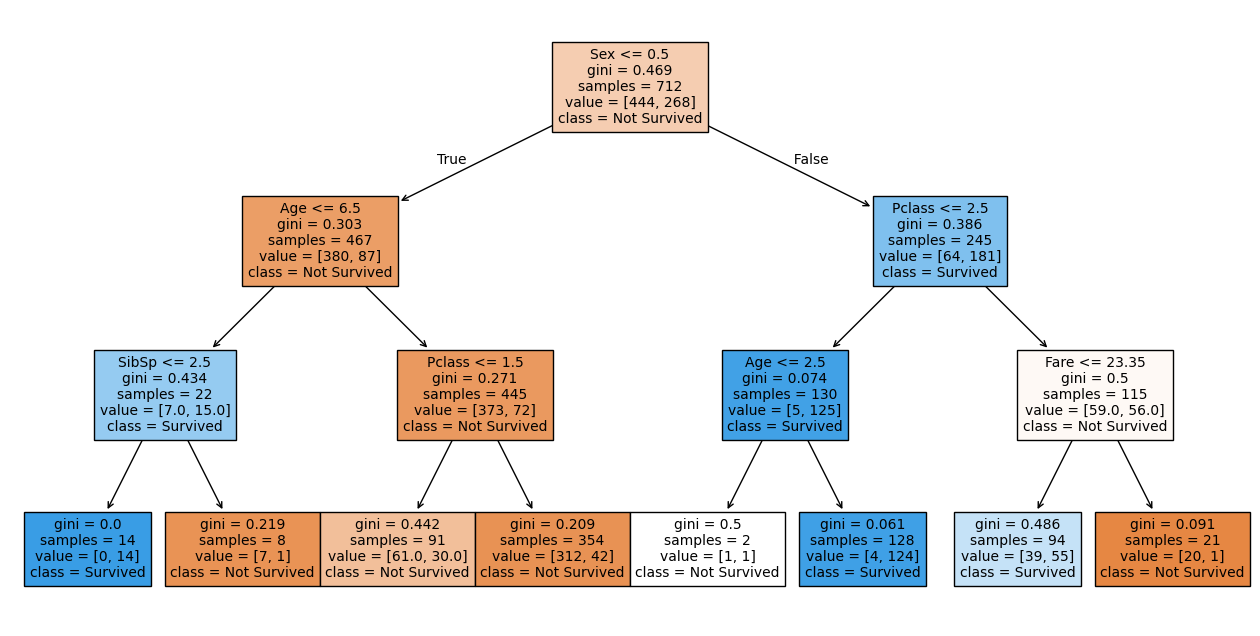

Accuracy: 0.7988826815642458


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt

# Load Titanic dataset from a public URL

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Select features and target

features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
df = df[features + ['Survived']]

# Handle missing values

df['Age'] = df['Age'].fillna(df['Age'].median())
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Encode categorical variables

df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

# Split data

X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42, max_depth=3)
clf.fit(X_train, y_train)

# Visualize the decision tree

plt.figure(figsize=(16,8))
plot_tree(clf, feature_names=X.columns, class_names=['Not Survived', 'Survived'], filled=True)
plt.show()

# Evaluate the model

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)